## Dijkstra's algorithm

In [1]:
#!pip install requests
#!pip install pandas
#!pip install networkx

In [ ]:
import requests
import math
import time
import json
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def round_math(value, decimals=2):
    if value is None:
        return None
    factor = 10 ** decimals
    if value >= 0:
        return math.floor(value * factor + 0.5) / factor
    else:
        return math.ceil(value * factor - 0.5) / factor
    
title_check_points = {
    100: "Arco de Santa Catalina",
    200: "Ruinas de santa clara",
    300: "Real Palacio de los Capitanes Generales",
    400: "Museo de San Agustín",
    500: "Convento Santa Teresa de Jesús",
    600: "Iglesia de Nuestra Señora de El Carmen",
    700: "Paseo de los Museos",
    800: "Museo Nacional de Arte de Guatemala",
    900: "Marco Arte Galeria",
    1000: "ChocoMuseo"
}

def nodo_name(n: int) -> str:
    rows = [
        "1a Calle Poniente",
        "2a Calle Poniente",
        "3a Calle Poniente",
        "4a Calle Poniente",
        "5a Calle Poniente",
        "6a Calle Poniente",
        "7a Calle Poniente"
    ]

    columns = [
        ("Alameda Santa Lucia", "Calzada Santa Lucia Sur"),
        "7a Avenida Norte",
        "6a Avenida Norte",
        "5a Avenida Norte",
        "4a Avenida Norte",
        "3a Avenida Norte",
        "2a Avenida Norte",
        "1a Avenida Norte"
    ]

    row_index = math.floor(n / 8)
    col_index = n % 8

    col = columns[col_index]
    if isinstance(col, tuple):
        if row_index < 4:
            col = col[0]
        else:
            col = col[1]
    return rows[row_index], col

def distance(tuple1, tuple2):
    return round_math(math.sqrt((tuple2[0] - tuple1[0])**2 + (tuple2[1] - tuple1[1])**2))


### Coordinates of the intersections of the chosen area (Antigua Guatemala)

In [4]:
coordinates = [(14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.74), (14.56, -90.74), (14.56, -90.74), (14.56, -90.73), (14.53, -90.74), (14.56, -90.74), (14.53, -90.74), (14.53, -90.74), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.56, -90.73), (14.55, -90.73), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.33, -91.03), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.56, -90.73), (14.56, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73), (14.55, -90.73), (14.56, -90.74), (14.55, -90.73), (14.56, -90.73)]

### Add edges

In [5]:
col_rules = ["both", "desc", "asc", "desc", "asc", "desc", "asc", "desc"]
row_rules = ["both", "asc", "desc", "asc", "desc", "both", "asc"]

map_graph = nx.DiGraph()
for node in range(8*7):
    map_graph.add_node(node)

for row in range(7-1):
    for col in range(8):

        # Add column edges with weight
        current_node = row*8 + col
        down_node = (row+1)*8 + col
        weight = distance(coordinates[current_node], coordinates[down_node])
        
        if col_rules[col] == "both":
            map_graph.add_edge(current_node, down_node, weight=weight)
            map_graph.add_edge(down_node, current_node, weight=weight)
        elif col_rules[col] == "asc":
            map_graph.add_edge(current_node, down_node, weight=weight)
        elif col_rules[col] == "desc":
            map_graph.add_edge(down_node, current_node, weight=weight)

for row in range(7):
    for col in range(8-1):
        
        # Add row edges with weight
        current_node = row*8 + col
        right_node = row*8 + (col+1)
        weight = distance(coordinates[current_node], coordinates[right_node])
        
        if row_rules[row] == "both":
            map_graph.add_edge(current_node, right_node, weight=weight)
            map_graph.add_edge(right_node, current_node, weight=weight)
        elif row_rules[row] == "asc":
            map_graph.add_edge(current_node, right_node, weight=weight)
        elif row_rules[row] == "desc":
            map_graph.add_edge(right_node, current_node, weight=weight)

#print(map_graph.nodes[0])

### Show map

In [6]:
#cols = 8
#rows = 7
#pos = {}
#
#for r in range(rows):
#    for c in range(cols):
#        node = r * cols + c
#        pos[node] = (c * 5, -r * 5)
#        
#nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
#edge_labels = nx.get_edge_attributes(map_graph, 'weight')
#nx.draw_networkx_edge_labels(map_graph, pos, edge_labels=edge_labels)
#plt.show()

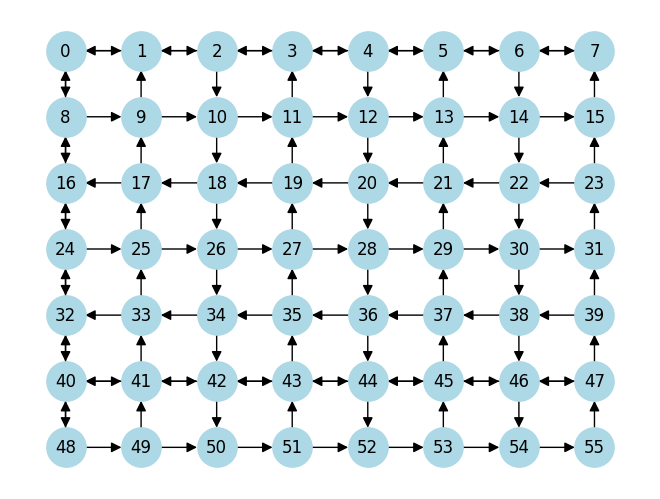

In [7]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)
        
nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
plt.show()

In [8]:
check_points = [
    [(14.55973874508855, -90.73422076688449), 11, 3],
    [(14.554861968606817, -90.73105039584416), 54, 46],
    [(14.55626906661756, -90.73375942692432), 35, 36],
    [(14.55638848781278, -90.73640944943139), 33, 25],
    [(14.560640514277763, -90.7328168111516), 4, 5],
    [(14.559021159325468, -90.73242656800224), 13, 21],
    [(14.559498244001478, -90.72953646953226), 7, 15],
    [(14.5559597646901, -90.73416059786072), 43, 35],
    [(14.55563265368269, -90.73533540546954), 42, 34],
    [(14.55739052385006, -90.7340214253345), 26, 27]
]

for point in check_points:
    try:
        map_graph.remove_edge(point[1], point[2])
    except:
        pass
    try:
        map_graph.remove_edge(point[2], point[1])
    except:
        pass


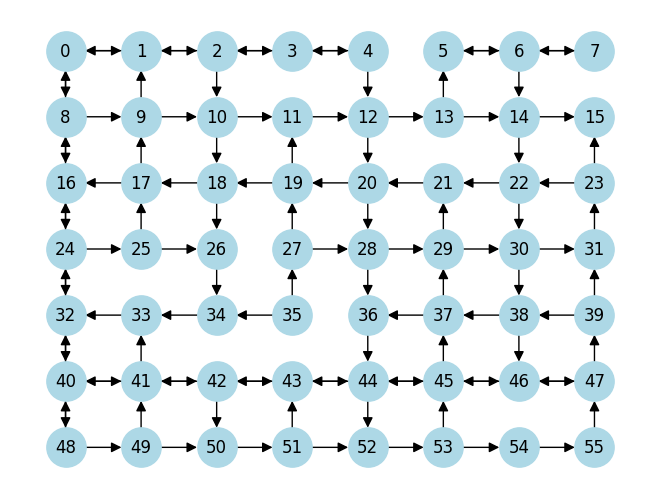

In [9]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)
        
nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
plt.show()

In [10]:
check_points = [
    [(14.55973874508855, -90.73422076688449), 11, 3],
    [(14.554861968606817, -90.73105039584416), 54, 46],
    [(14.55626906661756, -90.73375942692432), 36, 35],
    [(14.55638848781278, -90.73640944943139), 33, 25],
    [(14.560640514277763, -90.7328168111516), 4, 5],
    [(14.559021159325468, -90.73242656800224), 13, 21],
    [(14.559498244001478, -90.72953646953226), 7, 15],
    [(14.5559597646901, -90.73416059786072), 43, 35],
    [(14.55563265368269, -90.73533540546954), 42, 34],
    [(14.55739052385006, -90.7340214253345), 26, 27]
]

num = 100
map_graph.add_node(num)
from_node = 11
to_node = 3
coord = check_points[0][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 200
map_graph.add_node(num)
from_node = 54
to_node = 46
coord = check_points[1][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 300
map_graph.add_node(num)
from_node = 36
to_node = 35
coord = check_points[2][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 400
map_graph.add_node(num)
from_node = 33
to_node = 25
coord = check_points[3][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 500
map_graph.add_node(num)
from_node = 4
to_node = 5
coord = check_points[4][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

from_node = 5
to_node = 4
coord = check_points[4][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 600
map_graph.add_node(num)
from_node = 21
to_node = 13
coord = check_points[5][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 700
map_graph.add_node(num)
from_node = 15
to_node = 7
coord = check_points[6][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 800
map_graph.add_node(num)
from_node = 43
to_node = 35
coord = check_points[7][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 900
map_graph.add_node(num)
from_node = 42
to_node = 34
coord = check_points[8][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

num = 1000
map_graph.add_node(num)
from_node = 26
to_node = 27
coord = check_points[9][0]
weight = distance(coordinates[from_node], coord)
map_graph.add_edge(from_node, num, weight=weight)
weight = distance(coord, coordinates[to_node])
map_graph.add_edge(num, to_node, weight=weight)

#node = 1000
#print(f"Node {node}:")
#for neighbor in map_graph.neighbors(node):
#    weight = map_graph[node][neighbor]['weight']
#    print(f"  -> {neighbor} (weight: {weight})")

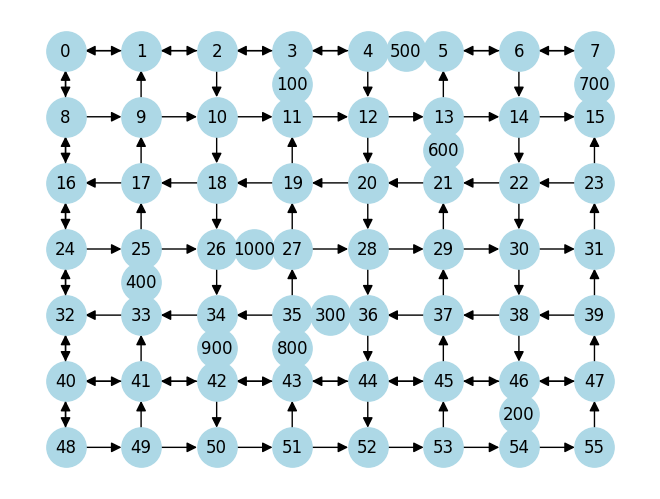

In [11]:
cols = 8
rows = 7
pos = {}

for r in range(rows):
    for c in range(cols):
        node = r * cols + c
        pos[node] = (c * 5, -r * 5)

checkpoint_nodes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

for i, checkpoint_node in enumerate(checkpoint_nodes):
    coord, from_node, to_node = check_points[i]
    pos[checkpoint_node] = ((pos[from_node][0] + pos[to_node][0]) / 2, 
                           (pos[from_node][1] + pos[to_node][1]) / 2)

nx.draw(map_graph, pos, with_labels=True, node_color='lightblue', node_size=800, arrowsize=15)
plt.show()

In [15]:

def dijikstra(start_node, end_node, map_graph):
    try:
        path = nx.dijkstra_path(map_graph, source=start_node, target=end_node, weight='weight')
        cost = nx.dijkstra_path_length(map_graph, source=start_node, target=end_node, weight='weight')
        return path, cost
    except nx.NetworkXNoPath:
        return None, float('inf')
    except nx.NodeNotFound as e:
        return None, str(e)

In [16]:
print(dijikstra(0, 100, map_graph))

([0, 8, 9, 10, 11, 100], 0.03)
